In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math

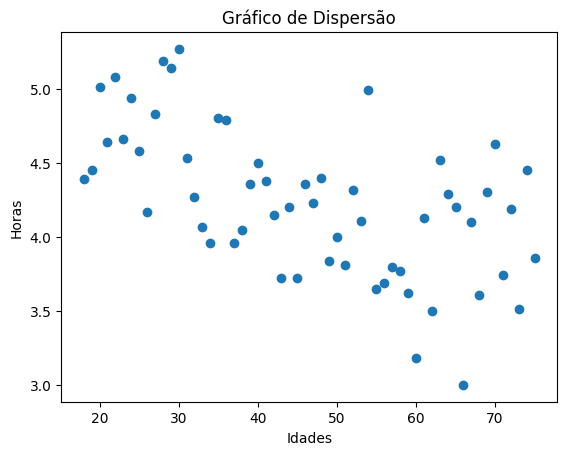

    idade  horas  idades^2  horas^2  (idade*horas)  (idade*horas)^2
0      49   3.84      2401    14.75         188.16         35404.19
1      26   4.17       676    17.39         108.42         11754.90
2      25   4.58       625    20.98         114.50         13110.25
3      44   4.20      1936    17.64         184.80         34151.04
4      55   3.65      3025    13.32         200.75         40300.56
5      43   3.72      1849    13.84         159.96         25587.20
6      31   4.53       961    20.52         140.43         19720.58
7      28   5.19       784    26.94         145.32         21117.90
8      18   4.39       324    19.27          79.02          6244.16
9      73   3.51      5329    12.32         256.23         65653.81
10     64   4.29      4096    18.40         274.56         75383.19
11     30   5.27       900    27.77         158.10         24995.61
12     51   3.81      2601    14.52         194.31         37756.38
13     46   4.36      2116    19.01         200.

"print(f'Desvio padrão dos resíduos -> S_e = {se}')"

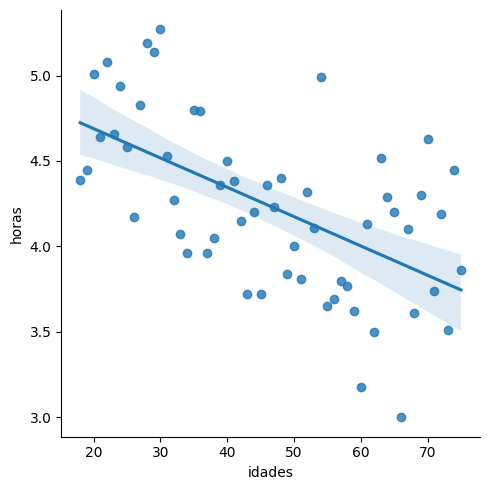

In [ ]:
# Consertando a base de dados e construindo o gráfico de dispersão

# Conserto da base de dados
tests = pd.read_csv('/content/test.csv')
cont1 = cont2 = soma = 0
horas = []
id = []

while cont1 < len(tests):
  soma += tests['online_hours'][cont1]
  cont2 += 1
  if cont2 == 7:
    horas.append((soma/7))
    cont2 = soma = 0
  else: pass
  cont1 += 1

cont1 = cont2 = soma = 0
while cont1 < len(tests):
  soma += tests['id'][cont1]
  cont2 += 1
  if cont2 == 7:
    id.append(np.ceil((soma/7)))
    cont2 = soma = 0
  else: pass
  cont1 += 1

data = {'id': id, 'online_hours': horas}
df_tests = pd.DataFrame(data)
df_tests = df_tests.sort_values(['id'], ascending=True)

customers = pd.read_csv('/content/customers.csv')
df_cust = customers.sort_values(['id'], ascending=True)
df_cust.insert(4, 'online_hours', df_tests['online_hours'])
df_cust

cont = 0
idades = df_cust['age'].unique()
horas_por_idade = []

variancia_por_idade = []
while cont < len(idades):
  # Calculando as variâncias de horas online para cada idade
  horas_de_cada_idade = (df_cust[df_cust['age'] == idades[cont]]['online_hours'])
  var_i = horas_de_cada_idade.var()
  variancia_por_idade.append(var_i)

  # Calculando a quantidade média de horas online por idade
  soma_horas_por_idade = sum(df_cust[df_cust['age'] == idades[cont]]['online_hours'])
  horas_por_idade.append(round(soma_horas_por_idade/len(df_cust[df_cust['age'] == idades[cont]]),2))
  cont += 1

data = {
    'idades':idades,
    'horas':horas_por_idade
}

# Construção do gráfico de dispersão

plt.scatter(data['idades'], data['horas'])
plt.xlabel('Idades')
plt.ylabel('Horas')
plt.title('Gráfico de Dispersão')
plt.show()

# Construindo a tabela de valores

idades2 = []
for i in range(len(idades)):
  idades2.append(round(idades[i]*idades[i],2))

horas2 = []
for i in range(len(horas_por_idade)):
  horas2.append(round(horas_por_idade[i]*horas_por_idade[i],2))

idades_horas = []
for i in range(len(idades)):
  idades_horas.append(round(horas_por_idade[i]*idades[i],2))

idades_horas2 = []
for i in range(len(idades)):
  idades_horas2.append(round(idades_horas[i]*idades_horas[i],2))

dados_t = {'idade':idades, 'horas':horas_por_idade, 'idades^2':idades2, 'horas^2':horas2, '(idade*horas)':idades_horas,'(idade*horas)^2':idades_horas2}
df_tabela = pd.DataFrame(dados_t)
print(df_tabela)
n = len(df_tabela)

# Armazenando os somatórios necessários
somatorios = {'idade': sum(df_tabela['idade']), 
              'horas': sum(df_tabela['horas']), 
              'idades^2': sum(df_tabela['idades^2']), 
              'horas^2': sum(df_tabela['horas^2']),
              '(idade*horas)': sum(df_tabela['(idade*horas)']),
              '(idade*horas)^2': sum(df_tabela['(idade*horas)^2']),
              }

# r - Coeficiente de correlação de Pearson
r1 = (n*somatorios['(idade*horas)'] - (somatorios['idade']*somatorios['horas']))
r2 = (math.sqrt(n*somatorios['idades^2'] - (somatorios['idade'])**2)) * (math.sqrt(n*somatorios['horas^2'] - (somatorios['horas'])**2))
r = r1/r2
"""print(f'Coeficiente de correlação -> r = {r}')"""

# t - Inferência sobre Rô

t_obs = r*math.sqrt(n-2)/math.sqrt(1-r**2) # Rejeita H0.
"""print(f'Inferência sobre Rô -> t_obs = {t_obs}')"""

# Montando o modelo de regressão linear

b = (n*somatorios['(idade*horas)'] - (somatorios['idade']*somatorios['horas']))/(n*somatorios['idades^2'] - (somatorios['idade'])**2)
a = (somatorios['horas']-b*somatorios['idade'])/n
"""print(f'Regressão linear: a + bx -> {a} + {b}x')"""

# Plotando o gráfico de dispersão com a reta de Regressão Linear
df_idades_horas = pd.DataFrame(data)
sns.lmplot(data=df_idades_horas, x = 'idades', y = 'horas')

# Atualizando os somatórios
desvio_med = []
media_horas = somatorios['horas']/n 

for i in range(n): # yi - y_barra
  desvio_med.append(df_tabela['horas'][i] - media_horas) 

desvio_reg = []
for i in range(n): # yi - y_chapeu
  regressao = (df_tabela['horas'][i]) - (a+b*df_tabela['idade'][i])
  desvio_reg.append(regressao)

desvio_med_art = []
for i in range(n): # y_chapeu - y_barra
  desvio = (a+b*df_tabela['idade'][i] - media_horas)
  desvio_med_art.append(desvio)

dif_quad_med_art = []
for i in range(n): # (y_chapeu - y_barra)^2
  dif = desvio_med_art[i]*desvio_med_art[i]
  dif_quad_med_art.append(dif)

dif_med_quad = []
for i in range(n): # (yi - y_barra)^2
  dif = desvio_med[i]*desvio_med[i]
  dif_med_quad.append(dif)

desvio_reg_quad = []
for i in range(n): # (yi - y_chapeu)^2
  desvio = desvio_reg[i]*desvio_reg[i]
  desvio_reg_quad.append(desvio)

somatorios['y_chapeu - y_barra'] = sum(desvio_med_art)
somatorios['(y_chapeu - y_barra)^2'] = sum(dif_quad_med_art)
somatorios['y - y_barra'] = sum(desvio_reg)
somatorios['(y - y_barra)^2'] = sum(dif_med_quad)
somatorios['y - y_chapeu'] = sum(desvio_reg)
somatorios['(y - y_chapeu)^2'] = sum(desvio_reg_quad)

# Coeficiente de determinação

rzao = somatorios['(y_chapeu - y_barra)^2']/somatorios['(y - y_barra)^2']
"""print(f" Coeficiente de determinação: R² = {rzao}")"""

# ANOVA

sqr = somatorios['(y_chapeu - y_barra)^2']
qmr = sqr
sqe = somatorios['(y - y_chapeu)^2']
qme = sqe/(n-2)
sqt = somatorios['(y - y_barra)^2']
qmt = sqt/(n-1)
f0 = qmr/qme  # Rejeita H0 -> A variável dependente influencia.
"""print(f'ANOVA -> f tabelado -> f0 = {f0}')"""

# Erros residuais

erros_residuais = []
erro_med = somatorios['y - y_chapeu']/n

for i in range(n):
  erro_res = (df_tabela['horas'][i]) - (a+b*df_tabela['idade'][i]) - erro_med
  erros_residuais.append(erro_res*erro_res)

somatorios['(ei - e_barra)^2'] = sum(erros_residuais)

se = math.sqrt((somatorios['(ei - e_barra)^2'])/(n-2))
"""print(f'Desvio padrão dos resíduos -> S_e = {se}')"""

In [ ]:
# Consertando a base de dados e construindo o gráfico de dispersão

# Conserto da base de dados
tests = pd.read_csv('/content/test.csv')
cont1 = cont2 = soma = 0
horas = []
id = []

while cont1 < len(tests):
  soma += tests['online_hours'][cont1]
  cont2 += 1
  if cont2 == 7:
    horas.append((soma/7))
    cont2 = soma = 0
  else: pass
  cont1 += 1

cont1 = cont2 = soma = 0
while cont1 < len(tests):
  soma += tests['id'][cont1]
  cont2 += 1
  if cont2 == 7:
    id.append(np.ceil((soma/7)))
    cont2 = soma = 0
  else: pass
  cont1 += 1

data = {'id': id, 'online_hours': horas}
df_tests = pd.DataFrame(data)
df_tests = df_tests.sort_values(['id'], ascending=True)

customers = pd.read_csv('/content/customers.csv')
df_cust = customers.sort_values(['id'], ascending=True)
df_cust.insert(4, 'online_hours', df_tests['online_hours'])
df_cust

cont = 0
idades = df_cust['age'].unique()
horas_por_idade = []

variancia_por_idade = []
while cont < len(idades):
  # Calculando as variâncias de horas online para cada idade
  horas_de_cada_idade = (df_cust[df_cust['age'] == idades[cont]]['online_hours'])
  var_i = horas_de_cada_idade.var()
  variancia_por_idade.append(var_i)

  # Calculando a quantidade média de horas online por idade
  soma_horas_por_idade = sum(df_cust[df_cust['age'] == idades[cont]]['online_hours'])
  horas_por_idade.append(round(soma_horas_por_idade/len(df_cust[df_cust['age'] == idades[cont]]),2))
  cont += 1

data = {
    'idades':idades,
    'horas':horas_por_idade
}

# Construindo a tabela de valores

idades2 = []
for i in range(len(idades)):
  idades2.append(round(idades[i]*idades[i],2))

horas2 = []
for i in range(len(horas_por_idade)):
  horas2.append(round(horas_por_idade[i]*horas_por_idade[i],2))

idades_horas = []
for i in range(len(idades)):
  idades_horas.append(round(horas_por_idade[i]*idades[i],2))

idades_horas2 = []
for i in range(len(idades)):
  idades_horas2.append(round(idades_horas[i]*idades_horas[i],2))

dados_t = {'idade':idades, 'horas':horas_por_idade, 'idades^2':idades2, 'horas^2':horas2, '(idade*horas)':idades_horas,'(idade*horas)^2':idades_horas2}
df_tabela = pd.DataFrame(dados_t)
df_tabela

,idade,horas,idades^2,horas^2,(idade*horas),(idade*horas)^2
0,49,3.84,2401,14.75,188.16,35404.19
1,26,4.17,676,17.39,108.42,11754.90
2,25,4.58,625,20.98,114.50,13110.25
3,44,4.20,1936,17.64,184.80,34151.04
4,55,3.65,3025,13.32,200.75,40300.56
5,43,3.72,1849,13.84,159.96,25587.20
6,31,4.53,961,20.52,140.43,19720.58
7,28,5.19,784,26.94,145.32,21117.90
8,18,4.39,324,19.27,79.02,6244.16
9,73,3.51,5329,12.32,256.23,65653.81
